# Sklearn
Implementation from the video: https://www.youtube.com/watch?v=0B5eIE_1vpU
<br>Afif - April 28, 2021

### House Price Prediction

In [30]:
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
import pandas as pd

In [31]:
X, y = load_boston(return_X_y=True)

In [32]:
X.shape, y.shape

((506, 13), (506,))

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [34]:
model = KNeighborsRegressor()

In [35]:
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [36]:
pred = model.predict(X)

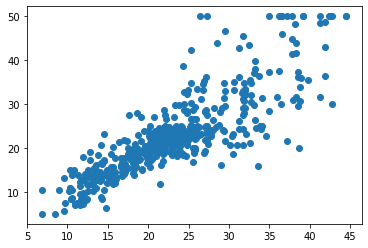

In [37]:
plt.scatter(pred, y)

### Pipeline

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [39]:
# Pipeline provides a way to preprocess data before training model
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

In [40]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=1, p=2,
                                     weights='uniform'))],
         verbose=False)

In [41]:
pred = pipe.predict(X)

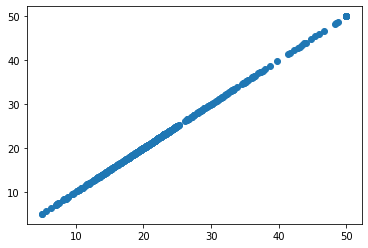

In [42]:
plt.scatter(pred, y)

### Grid Search

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('model',
   KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                       weights='uniform'))],
 'verbose': False,
 'scale': StandardScaler(copy=True, with_mean=True, with_std=True),
 'model': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [45]:
model = GridSearchCV(estimator=pipe,
             param_grid={'model__n_neighbors': [i for i in range(1, 11)]},
             cv=3)

In [46]:
model.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=1, p=2,
                                                            weights='uniform'))],
                                verbose=False),
 

In [48]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000333,4.713704e-04,0.001666,4.696346e-04,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262789,0.127163,10
1,0.000667,4.715390e-04,0.001000,4.899036e-07,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313525,0.101728,9
2,0.000667,4.715952e-04,0.001333,4.714266e-04,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.403067,0.064942,1
3,0.000333,4.715951e-04,0.001334,4.718199e-04,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383838,0.083612,7
4,0.001000,4.052337e-07,0.001334,4.710894e-04,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374507,0.103621,8
5,0.000667,4.714827e-04,0.001334,4.714827e-04,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390813,0.116349,6
6,0.000667,4.713705e-04,0.001667,4.712583e-04,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391508,0.122949,5
7,0.000334,4.718199e-04,0.001334,4.714827e-04,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398375,0.155051,2
8,0.000667,4.715390e-04,0.001334,4.714827e-04,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394800,0.165545,3
9,0.000334,4.719323e-04,0.001667,4.718764e-04,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.392321,0.184645,4


In [51]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu